## RBF Network Classifier using Sklearn

Abaixo será feita a documentação da implementação e treinamento de uma RBF (Radial Basis Function Neural Networks) em um problema de classificação de uma amostra de dados distribuídas em quatro gaussianas com as classes mostradas de maneira alternada, assim como o Problema XOR.

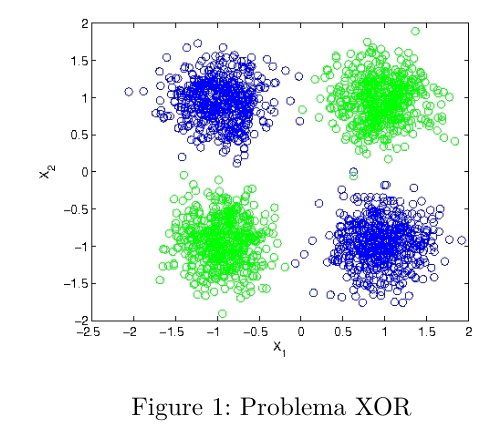

### Importando bibliotecas

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # KMeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Gerando o problema XOR

In [16]:
def generate_xor_data(n_samples, mean, std):
    np.random.seed(42)

    # Generate Gaussian blobs for XOR
    X1 = np.random.normal(loc=mean, scale=std, size=(n_samples, 2))
    X2 = np.random.normal(loc=[mean[0], -mean[1]], scale=std, size=(n_samples, 2))
    X3 = np.random.normal(loc=[-mean[0], mean[1]], scale=std, size=(n_samples, 2))
    X4 = np.random.normal(loc=[-mean[0], -mean[1]], scale=std, size=(n_samples, 2))

    # Assign labels to create XOR problem
    y1 = np.zeros(n_samples)
    y2 = np.ones(n_samples)
    y3 = np.ones(n_samples)
    y4 = np.zeros(n_samples)
    
    # Concatenate all data points
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    
    return X, y


### Rede RBF

In [33]:
class RBFNetwork:
    def __init__(self, n_clusters, sigma):
        self.n_clusters = n_clusters
        self.sigma = sigma
        self.kmeans = KMeans(n_clusters=self.n_clusters)
        self.scaler = StandardScaler()
        self.classifier = LogisticRegression()
    
    def _rbf(self, X, centers):
        return np.exp(-np.linalg.norm(X[:, np.newaxis] - centers, axis=2) ** 2)
    
    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.kmeans.fit(X_scaled)
        centers = self.kmeans.cluster_centers_
        transformed_X = self._rbf(X_scaled, centers)
        self.classifier.fit(transformed_X, y)
    
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        centers = self.kmeans.cluster_centers_
        transformed_X = self._rbf(X_scaled, centers)
        return self.classifier.predict(transformed_X)
    
    def get_params(self):
        return self.kmeans.cluster_centers_, self.classifier.coef_, self.classifier.intercept_


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-----------------------------------
Simulação  1
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.00%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-----------------------------------
Simulação  2
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.00%
-----------------------------------
Simulação  3
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.00%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

-----------------------------------
Simulação  4
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.00%
-----------------------------------
Simulação  5
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.00%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

-----------------------------------
Simulação  6
Acurácia: 97.50%
Desvio Padrão da Acurácia: 0.93%
-----------------------------------
Simulação  7
Acurácia: 100.00%
Desvio Padrão da Acurácia: 0.87%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

-----------------------------------
Simulação  8
Acurácia: 97.50%
Desvio Padrão da Acurácia: 1.08%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-----------------------------------
Simulação  9
Acurácia: 100.00%
Desvio Padrão da Acurácia: 1.04%


c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-----------------------------------
Simulação  10
Acurácia: 100.00%
Desvio Padrão da Acurácia: 1.00%
Mean Accuracy: 99.50%
Standard Deviation: 1.00%


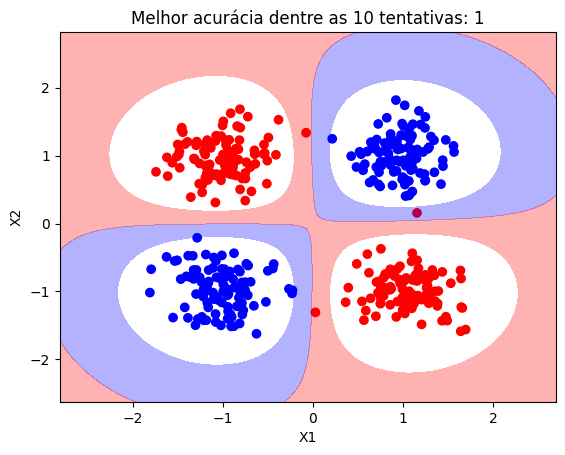

In [32]:
# Generate XOR data
n_samples = 100
mean = [1.0, 1.0]
std = 0.3
X, y = generate_xor_data(n_samples, mean, std)

# Prepare for simulations
n_simulations = 10
accuracies = []
sigma = 1.0  # Adjust sigma according to your data distribution

best_accuracy = 0
best_accuracy_number = 0
best_centers = None
best_coef = None
best_intercept = None

for _ in range(n_simulations):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
    
    # Train RBF Network
    rbf_network = RBFNetwork(n_clusters=4, sigma=-sigma)
    rbf_network.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = rbf_network.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print('-----------------------------------')
    print('Simulação ', _ + 1)

    # Print accuracy for each simulation
    print(f'Acurácia: {accuracy * 100:.2f}%')

    # Print desvio padrão for each simulation
    print(f'Desvio Padrão da Acurácia: {np.std(accuracies) * 100:.2f}%')

    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_number = _ + 1
        best_centers, best_coef, best_intercept = rbf_network.get_params()

# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# Generate report
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
print(f'Standard Deviation: {std_accuracy * 100:.2f}%')

# Plotando o melhor hiper-elipsóide
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Melhor acurácia dentre as 10 tentativas: {}'.format(best_accuracy_number))
plt.xlabel('X1')
plt.ylabel('X2')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = StandardScaler().fit(X).transform(grid)
transformed_grid = np.exp(-np.linalg.norm(grid_scaled[:, np.newaxis] - best_centers, axis=2) ** 2)
Z = (transformed_grid @ best_coef.T + best_intercept).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red'])
plt.show()